## Connecting Google Drive To load the saved Data

In [1]:
#Mounting the Colab diretory
from google.colab import drive
my_path = '/content/drive'
drive.mount(my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Data converting JSON to DataFrame

In [2]:
# converting datafile into a pandas dataframe
file = open("/content/drive/MyDrive/CIS_509/political_orientation_data.json", "r") # replace this path to open a data file
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_json(file,lines=True) # representing data as a panda dataframe
#df.head()
df.shape

(5000, 2)

In [3]:
df.head(5)

,text,label
0,"50 Years On, The Feminist Press Is Radical and...",Liberal
1,Anti-worker bills are working their way throug...,Liberal
2,The FBI Seized Almost $1 Million From This Fam...,Conservative
3,Stephanie Grisham’s Book Details Trump’s ‘Terr...,Liberal
4,How Trump kept peace,Conservative


## Vectorize the Text using TFIDF Max Features = 10000

In [4]:
 # we can use TFKeras built-in vectorizer but scikit-learn's vectorizer is more straightforward
review_corpus = [] # store all reviews here so that we can fit the vectorizer with this dataset
y = []
count = 0
for index, row in df.iterrows():
  review_text = row['text'] 
  if row['label'] == "Liberal":
    label = 1 # Liberal
  else:
    label = 0 # Conservative
  review_corpus.append(review_text)
  y.append(label)
  count += 1
  if count == 5000:
    break
vectorizer = TfidfVectorizer(max_features=10000) # the value of max_features is dependent on how you design your model
vectorizer.fit(review_corpus) # fit the vectorizer with the entire dataset
# once we fitted the vectorizer, we use it for converting raw text (review) into vectors
vectorized_review = vectorizer.transform(review_corpus)

In [5]:
vectorized_review

<5000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 58528 stored elements in Compressed Sparse Row format>

### Shape after vectorized

In [6]:
print(vectorized_review.shape)
print(type(vectorized_review))
import numpy as np
X, Y = vectorized_review.toarray(), np.asarray(y) # convert both input (vectorized_review) and output (y) into numpy variables so that a TFkeras model can understand them

(5000, 10000)
<class 'scipy.sparse.csr.csr_matrix'>


## Visualising the Layers

Model: "ANN_two_hidden_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10000)]           0         
                                                                 
 hidden_layer1 (Dense)       (None, 5000)              50005000  
                                                                 
 hidden_layer2 (Dense)       (None, 2500)              12502500  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 62,510,001
Trainable params: 62,510,001
Non-trainable params: 0
_________________________________________________________________


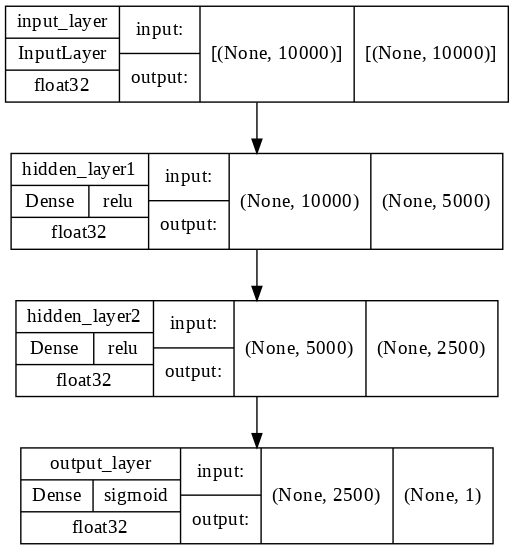

In [7]:

input_layer = tf.keras.Input(shape=10000, name="input_layer")
hidden_layer1 = tf.keras.layers.Dense(units=5000, activation="relu", name="hidden_layer1")(input_layer)
hidden_layer2 = tf.keras.layers.Dense(units=2500, activation="relu", name="hidden_layer2")(hidden_layer1)
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")(hidden_layer2)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="ANN_two_hidden_layer")
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]) #tracking only accuracy
model.summary()
tf.keras.utils.plot_model(model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100,
    layer_range=None,
    show_layer_activations=True)

## Fitting the Model 
#### Note: Run it on GPU for speed

In [8]:
# model.fit(x=X, y=Y, epochs=30, batch_size=8, validation_split=0.25)

In [9]:
filepath = "/content/drive/MyDrive/CIS_509/ANN_Model2"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True, monitor="val_accuracy", mode="max", verbose=1) # Saves only the best model (i.e., for each epoch during training, save model only if the current version outperforms the previous version)
history = model.fit(x=X, y=Y, epochs=30, batch_size=8, validation_split=0.25, callbacks=cp_callback)

Epoch 1/30
468/469 [============================>.] - ETA: 0s - loss: 0.6575 - accuracy: 0.6485
Epoch 1: val_accuracy improved from -inf to 0.64320, saving model to /content/drive/MyDrive/CIS_509/ANN_Model2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CIS_509/ANN_Model2/assets
469/469 [==============================] - 18s 30ms/step - loss: 0.6576 - accuracy: 0.6483 - val_loss: 0.6513 - val_accuracy: 0.6432
Epoch 2/30
466/469 [============================>.] - ETA: 0s - loss: 0.6477 - accuracy: 0.6483
Epoch 2: val_accuracy did not improve from 0.64320
469/469 [==============================] - 8s 17ms/step - loss: 0.6473 - accuracy: 0.6491 - val_loss: 0.6507 - val_accuracy: 0.6432
Epoch 3/30
469/469 [==============================] - ETA: 0s - loss: 0.6463 - accuracy: 0.6491
Epoch 3: val_accuracy did not improve from 0.64320
469/469 [==============================] - 8s 17ms/step - loss: 0.6463 - accuracy: 0.6491 - val_loss: 0.6503 - val_accuracy: 0.6432
Epoch 4/30
468/469

## Save The Model into a Folder

In [10]:
model.save("/content/drive/MyDrive/CIS_509/ANN_Model2")

In [11]:
New_Data = ["Anarcho-capitalism, in my opinion, is a doctrinal system which, if ever implemented, would lead to forms of tyranny and oppression that have few counterparts in human history.","Biden's Response to Putin's Invasion of Ukraine Has Been His Finest Moment"]

## Load the Model

In [12]:
#load your model here
new_model = tf.keras.models.load_model("/content/drive/MyDrive/CIS_509/ANN_Model2")

## Vectorize the new data and predict using the loaded model

In [13]:
vectorized_new_data = vectorizer.transform(New_Data)
new_x = vectorized_new_data.toarray()

new_model.predict(new_x)

array([[0.54902565],
       [0.03790431]], dtype=float32)

### Visualizing the Model Loss and Accuracy

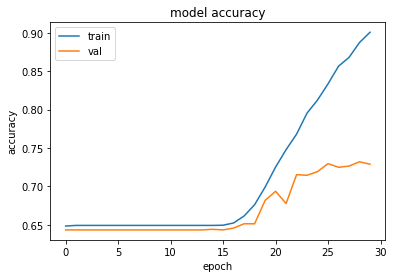

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

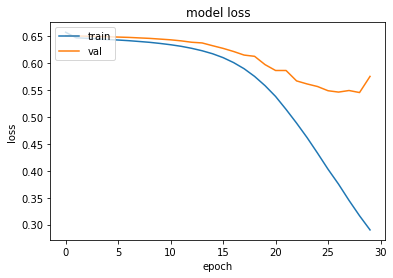

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()